In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\satya\Downloads\time_series_data.csv")
data['date'] = pd.to_datetime(data['date'])
data

,date,sales,customers,discount,temperature
0,2020-01-01,202,49,7.40,10.3
1,2020-01-02,535,107,42.63,31.9
2,2020-01-03,960,49,35.54,27.2
3,2020-01-04,370,100,45.35,23.0
4,2020-01-05,206,42,6.62,13.8
...,...,...,...,...,...
1995,2025-06-18,448,113,28.43,36.5
1996,2025-06-19,214,161,2.96,38.4
1997,2025-06-20,797,28,31.64,24.6
1998,2025-06-21,422,174,38.45,31.1


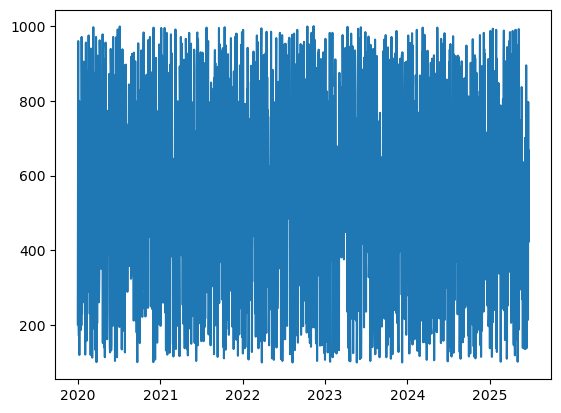

In [3]:
plt.plot(data['date'], data['sales'])

In [4]:
by_weeks_sales_interval = data['sales'].rolling(7).mean()
by_months_sales_interval = data['sales'].rolling(30).mean()

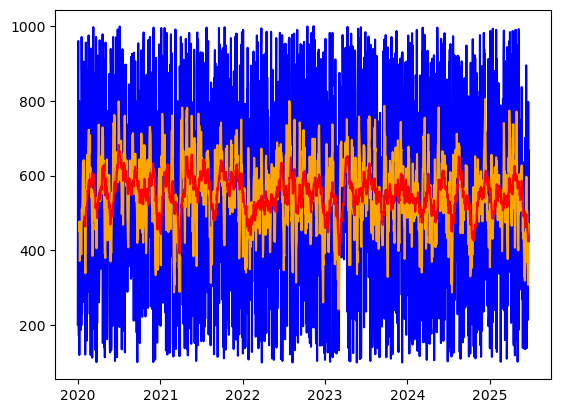

In [5]:
plt.plot(data['date'], data['sales'], label = "daily sales", c='blue')
plt.plot(data['date'], by_weeks_sales_interval, label="7-days average sales", c="orange")
plt.plot(data['date'], by_months_sales_interval, label="30-days average sales", c="red")
plt.show()

In [6]:
arima = ARIMA(data['sales'], order=(2, 0, 2))

In [7]:
arima_fit = arima.fit()

In [8]:
forecast_step = 30
forecast_result = arima_fit.forecast(forecast_step)
forecast_result

2000    572.512616
2001    535.687077
2002    545.380544
2003    565.172676
2004    533.588261
2005    554.083514
2006    556.679813
2007    536.231664
2008    558.166627
2009    549.618036
2010    541.104235
2011    558.404618
2012    545.204339
2013    546.112321
2014    556.236623
2015    543.515738
2016    549.944381
2017    553.145467
2018    543.914309
2019    552.095734
2020    550.267947
2021    545.486230
2022    552.680860
2023    548.244004
2024    547.379012
2025    552.163262
2026    547.249577
2027    548.991848
2028    551.102908
2029    547.133263
Name: predicted_mean, dtype: float64

In [9]:
data['date'] = pd.to_datetime(data['date'])
forecast_date = pd.date_range(data['date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_step)
forecast_df = pd.DataFrame({
    "future_date" : forecast_date,
    "predicted_sales" : forecast_result
})
forecast_df.reset_index(inplace=True)
forecast_df = forecast_df.drop(['index'], axis=1)
forecast_df

,future_date,predicted_sales
0,2025-06-23,572.512616
1,2025-06-24,535.687077
2,2025-06-25,545.380544
3,2025-06-26,565.172676
4,2025-06-27,533.588261
5,2025-06-28,554.083514
6,2025-06-29,556.679813
7,2025-06-30,536.231664
8,2025-07-01,558.166627
9,2025-07-02,549.618036


In [38]:
in_sample_preds = arima_fit.fittedvalues
rmse = np.sqrt(mean_squared_error(data['sales'], in_sample_preds))

In [40]:
rmse

266.2783368477719

## Heart diseases prediction

In [45]:
df = pd.read_csv("C:/Users/satya/Downloads/heart_disease_dataset.csv")
print(df.head())

   Patient_Age  Cholesterol_Level  Blood_Pressure  Heart_Size_cm3  \
0           45         240.087480             164      306.181018   
1           24         174.938300             101      392.607146   
2           52         206.960611             151      359.799091   
3           72         242.579134             107      339.798773   
4           45         295.472830             152      273.402796   

   Heart_Disease  
0              0  
1              0  
2              0  
3              1  
4              1  


In [47]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

Missing Values:
 Patient_Age          0
Cholesterol_Level    0
Blood_Pressure       0
Heart_Size_cm3       0
Heart_Disease        0
dtype: int64
Duplicate Rows: 0


In [49]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns and apply scaling
scaled_features = scaler.fit_transform(df[["Patient_Age", "Cholesterol_Level", "Blood_Pressure", "Heart_Size_cm3"]])

# Convert scaled features into a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=["Patient_Age", "Cholesterol_Level", "Blood_Pressure", "Heart_Size_cm3"])

# Add the target variable back
df_scaled["Heart_Disease"] = df["Heart_Disease"]

# Display first 5 rows after scaling
print(df_scaled.head())

   Patient_Age  Cholesterol_Level  Blood_Pressure  Heart_Size_cm3  \
0    -0.211930           0.363459        1.066111       -0.424789   
1    -1.389474          -1.136382       -1.325252        1.547480   
2     0.180585          -0.399176        0.572655        0.798791   
3     1.302055           0.420821       -1.097503        0.342378   
4    -0.211930           1.638521        0.610614       -1.172797   

   Heart_Disease  
0              0  
1              0  
2              0  
3              1  
4              1  


In [51]:
# Define features and target variable
X = df_scaled.drop(columns=["Heart_Disease"])
y = df_scaled["Heart_Disease"]

# Split data: training, testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [55]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-score: {f1:.2%}")

Confusion Matrix:
 [[  0 119]
 [  0 281]]
Accuracy: 70.25%
Precision: 70.25%
Recall: 100.00%
F1-score: 82.53%
